# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


#### Import libraries and load the data

In [352]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
# Import supplementary visualizations code visuals.py
import visuals_modified1 as vs

# Pretty display for notebooks
%matplotlib inline

path = "/Users/naiyan/desktop/Unsupervised/"
# Load the wholesale customers dataset
data = pd.read_csv(path + "customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
data.head(3)

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


#### Data Exploration

In [23]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


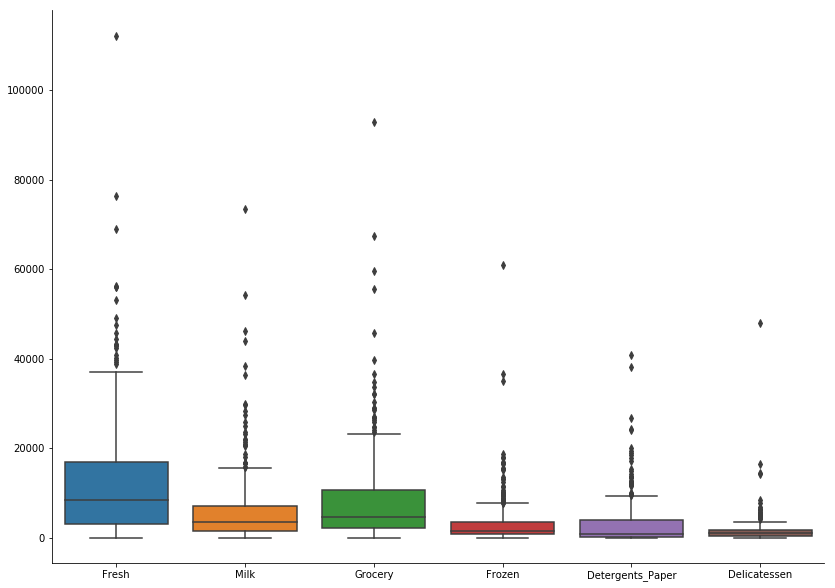

In [32]:
import seaborn as sns
sns.catplot(kind = 'box', data=data, height=8.27, aspect=11.7/8.27)

#### Explore the relationship between features using scatterplots and correlation matrix

#### 'Grocery' looks highly correlated with at least 2 features : 'Detergents_Paper' and 'Milk'.


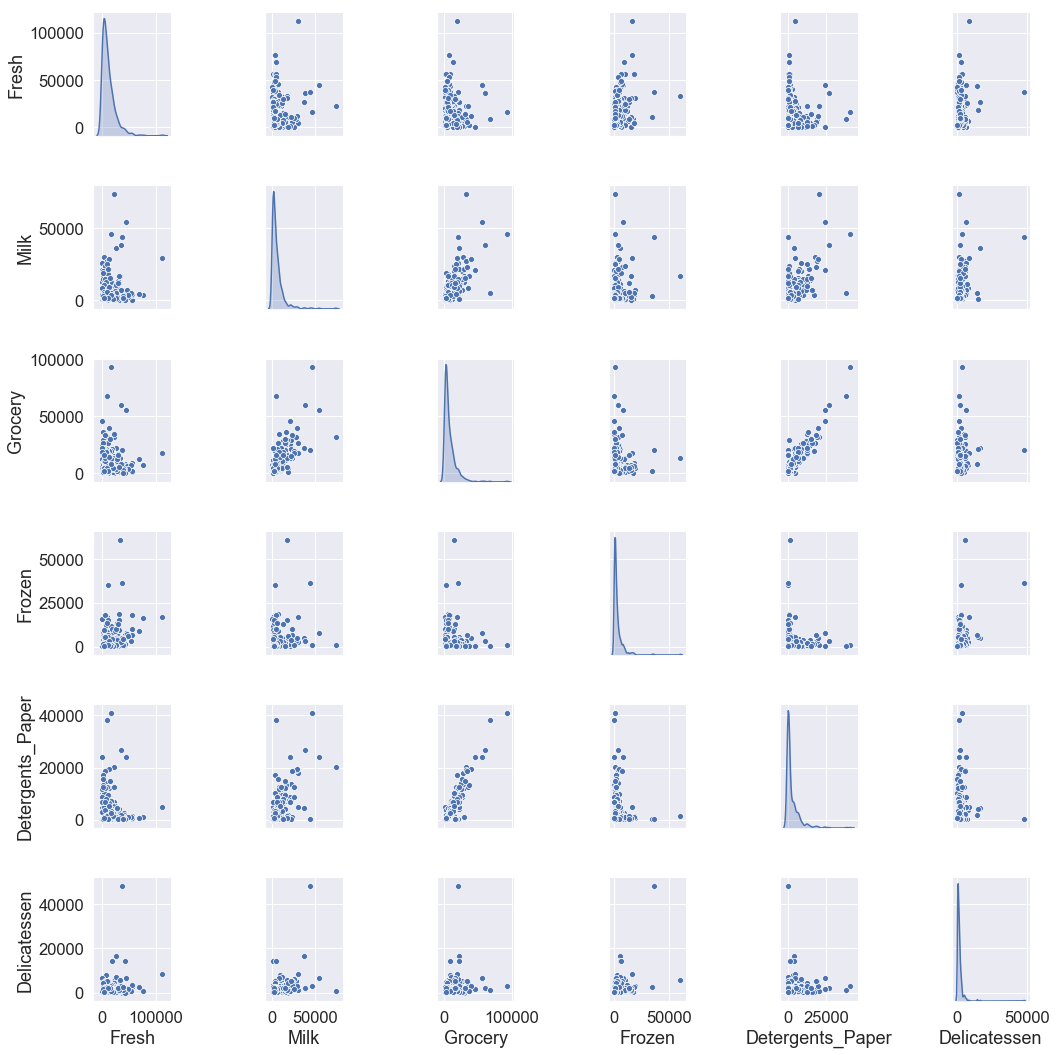

In [172]:
sns.pairplot(data[data.columns], size = 2.5, diag_kind = 'kde')
plt.tight_layout()
plt.show()

Correlation matrix of features:


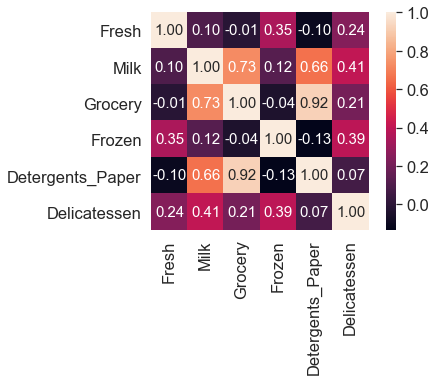

In [113]:
print('Correlation matrix of features:')
corr_matrix = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size':15},yticklabels=data.columns, xticklabels=data.columns)
plt.show()

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

#### 'Grocery' is removed as the feature of choice for prediction. 3 regression models (linear and nonlinear) are employed below to predict 'Grocery' based on the 5 other features. All 3 regressors reveal that the feature 'Detergents_Paper' is the most discriminative feature to predict 'Grocery'. 

#### 1. Decision tree regressor

In [163]:
dropped_feature = ['Grocery']
X = data.copy()
X.drop(labels=dropped_feature, axis=1, inplace=True)
features_left = X.columns
Y = np.array(data['Grocery'])
# X ~ n_samples x n_features
X = np.array(X)

Best max_depth {'max_depth': 3}
R2 score on train set: 0.8503932247964442
R2 score on test set: 0.8221366331307044

Feature importance:
Fresh 0.0
Milk 0.03903464051733761
Frozen 0.0
Detergents_Paper 0.959505730111196
Delicatessen 0.0014596293714663987



Text(0, 0.5, 'Annual spending amount on grocery')

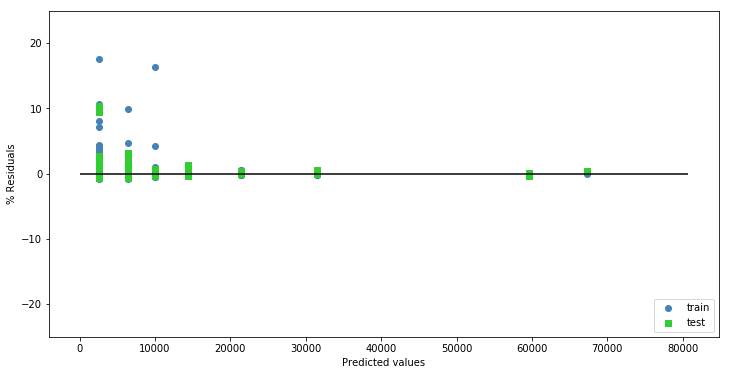

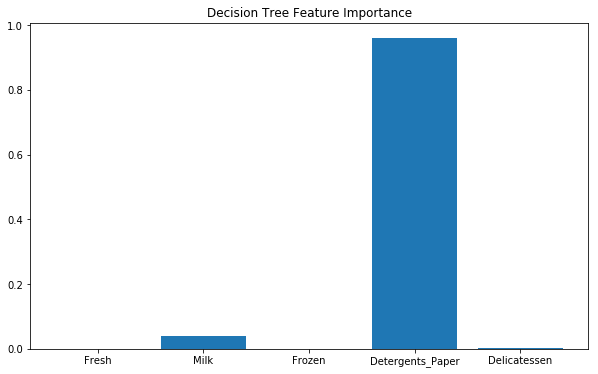

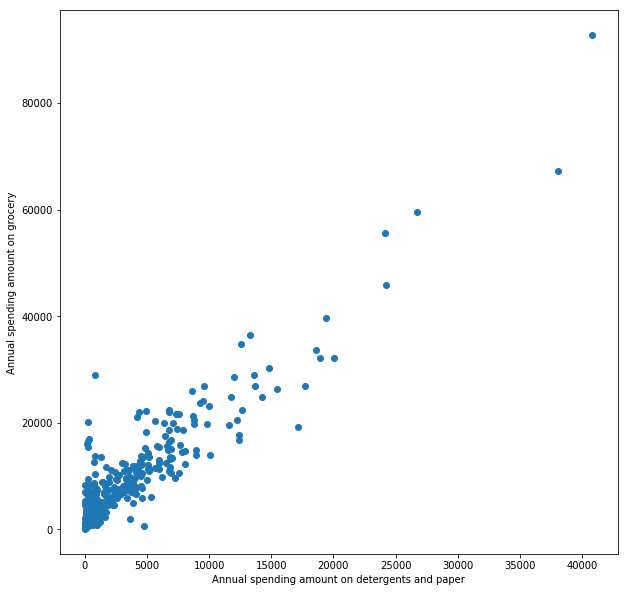

In [109]:
# Decision tree doesn't require feature scaling
# from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.base import clone
import time 
import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.25, random_state = 1)
Num_of_folds = 4
parameters = [{'max_depth': np.arange(1,21,2)}]

k_fold = KFold(n_splits=Num_of_folds,shuffle=True,random_state=1)
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),param_grid=parameters,cv=k_fold,scoring='r2', n_jobs=-1)
gs.fit(X_train,y_train)
print('Best max_depth', gs.best_params_)

best_regressor = clone(gs.best_estimator_)
best_regressor.fit(X_train,y_train)

# R2 score on train set
train_score = best_regressor.score(X_train,y_train)
print('R2 score on train set:', train_score)

# R2 score on test set
test_score = best_regressor.score(X_test,y_test)
print('R2 score on test set:', test_score)

# Predictions on train set
y_train_pred = best_regressor.predict(X_train)
# Predictions on test set
y_test_pred = best_regressor.predict(X_test)

fig = plt.figure(figsize=(12,6))
plt.scatter(y_train_pred, (y_train_pred - y_train)/y_train, c = 'steelblue', marker = 'o', label = 'train')
plt.scatter(y_test_pred, (y_test_pred - y_test)/y_test, c = 'limegreen', marker = 's', label = 'test')
# one outlier not shown
plt.ylim([-25,25])
plt.xlabel('Predicted values')
plt.ylabel('% Residuals')
plt.legend(loc='lower right')
plt.hlines(y = 0, color = 'black', xmin = 0, xmax=max(max(y_train_pred), max(y_test_pred))*1.2 )

print('')
print('Feature importance:')
[print(features_left[i], best_regressor.feature_importances_[i]) for i in range(len(features_left))]
print('')

fig = plt.figure(figsize=(10,6))
plt.title('Decision Tree Feature Importance')
plt.bar(features_left, best_regressor.feature_importances_)

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,3], Y)
plt.xlabel('Annual spending amount on detergents and paper')
plt.ylabel('Annual spending amount on grocery')


#### 2. Random forest regressor

#### The feature 'Detergents_Paper' is still the most discriminative feature to predict 'Grocery'. 

#### Random forest regressor overfits training data a bit more than decision tree regressor but it has a higher R2 score on the test set.

Best n_estimators {'n_estimators': 700}
R2 score on train set: 0.9663190299410426
R2 score on test set: 0.8481408428943379

Feature importance:
Fresh 0.0294594083269635
Milk 0.11328690737693933
Frozen 0.024865623024000836
Detergents_Paper 0.8042982267748809
Delicatessen 0.028089834497215232



Text(0, 0.5, 'Annual spending amount on grocery')

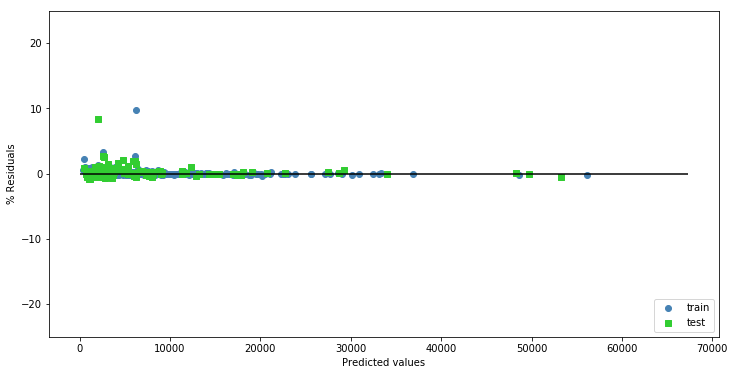

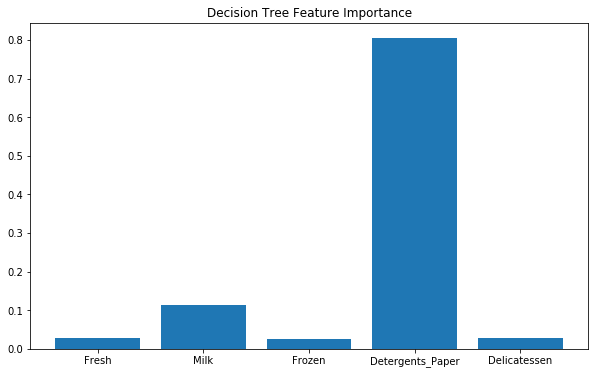

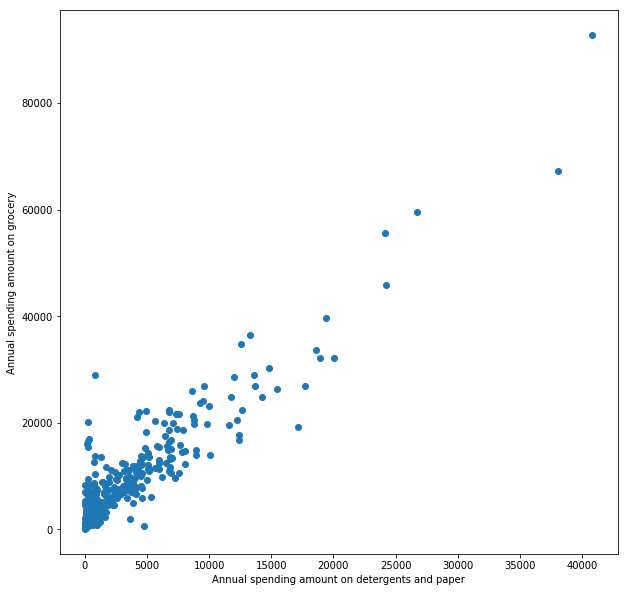

In [110]:
# Random forest doesn't require feature scaling
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.base import clone
import time 
import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.25, random_state = 1)
Num_of_folds = 4
parameters = [{'n_estimators': np.arange(100,2100,200)}]

k_fold = KFold(n_splits=Num_of_folds,shuffle=True,random_state=1)
gs = GridSearchCV(estimator=RandomForestRegressor(random_state=1, n_jobs=-1),param_grid=parameters,cv=k_fold,scoring='r2', n_jobs=-1)
gs.fit(X_train,y_train)
print('Best n_estimators', gs.best_params_)

best_regressor = clone(gs.best_estimator_)
best_regressor.fit(X_train,y_train)

# R2 score on train set
train_score = best_regressor.score(X_train,y_train)
print('R2 score on train set:', train_score)

# R2 score on test set
test_score = best_regressor.score(X_test,y_test)
print('R2 score on test set:', test_score)

# Predictions on train set
y_train_pred = best_regressor.predict(X_train)
# Predictions on test set
y_test_pred = best_regressor.predict(X_test)

fig = plt.figure(figsize=(12,6))
plt.scatter(y_train_pred, (y_train_pred - y_train)/y_train, c = 'steelblue', marker = 'o', label = 'train')
plt.scatter(y_test_pred, (y_test_pred - y_test)/y_test, c = 'limegreen', marker = 's', label = 'test')
# one outlier not shown
plt.ylim([-25,25])
plt.xlabel('Predicted values')
plt.ylabel('% Residuals')
plt.legend(loc='lower right')
plt.hlines(y = 0, color = 'black', xmin = 0, xmax=max(max(y_train_pred), max(y_test_pred))*1.2 )

print('')
print('Feature importance:')
[print(features_left[i], best_regressor.feature_importances_[i]) for i in range(len(features_left))]
print('')

fig = plt.figure(figsize=(10,6))
plt.title('Decision Tree Feature Importance')
plt.bar(features_left, best_regressor.feature_importances_)

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,3], Y)
plt.xlabel('Annual spending amount on detergents and paper')
plt.ylabel('Annual spending amount on grocery')


#### 3. Linear regression model

#### [Linear regression doesn't require normalization by a single factor but it will be helpful to perform standard scaling to standardize the variables for better convergence of the GD algorithm](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data). However sklearn's implementation uses LIBLINEAR library which work with unstandardized variables

Avg R2 score on train set: 0.8859128626322497
Avg R2 score on test set: 0.8536349790408212

MSE train: 0.112, MSE_test: 0.131

Linear Regression Estimated Coefficients:
Fresh 0.035620974914521174
Milk 0.1526889982977826
Frozen 0.005700130498802477
Detergents_Paper 0.8217947554376427
Delicatessen 0.08141597752830712



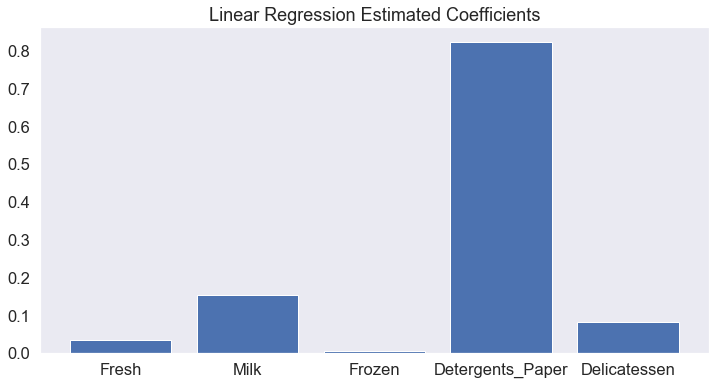

In [166]:
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Optional
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y[:, np.newaxis]).flatten()

num_repeats = 1000

X_train, X_test, y_train, y_test =  train_test_split(X_std, y_std, test_size = 0.25, random_state = 242)
lr = LinearRegression()
lr.fit(X_train, y_train)
coefficients = lr.coef_
# Predictions on train set
y_train_pred = lr.predict(X_train)
# Predictions on test set
y_test_pred = lr.predict(X_test)
# R2 score on train set
train_score = lr.score(X_train,y_train)
# R2 score on test set
test_score = lr.score(X_test,y_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

for i in range(num_repeats):
    X_train, X_test, y_train, y_test =  train_test_split(X_std, y_std, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    train_score += lr.score(X_train,y_train)  
    test_score += lr.score(X_test,y_test)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    mse_train += mean_squared_error(y_train,y_train_pred)
    mse_test += mean_squared_error(y_test, y_test_pred) 
    coefficients += lr.coef_

print('Avg R2 score on train set:', train_score/(num_repeats+1))
print('Avg R2 score on test set:', test_score/(num_repeats+1))

print('')
print('MSE train: %0.3f, MSE_test: %0.3f' %(mse_train/(num_repeats+1), mse_test/(num_repeats+1)))

print('')
print('Linear Regression Estimated Coefficients:')
avg_coeff = coefficients/(num_repeats+1)
[print(features_left[i], avg_coeff[i]) for i in range(len(features_left))]
print('')

fig = plt.figure(figsize=(12,6))
plt.title('Linear Regression Estimated Coefficients')
plt.bar(features_left, avg_coeff)
plt.grid('off')


### Question
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

### Answer

I attempted to predict grocery purchase using linear regression, decision tree and random forest regression. The $R^{2}$ is 0.854, 0.822, 0.848 respectively. All 3 regressors show that there is correlation between grocery and the other features, with 'Detergents_Paper' being the most discriminative feature. The grocery feature is not necessary for identifying customers' spending habits because it is correlated with at least one of the other features. These observations agree with the paired scatterplots ans correlation matrix analyses. 

### Question
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

### Answer 

The pairs within 'Grocery', 'Detergents_Paper', and 'Milk' show the highest correlation in the correlation heatmap. These correlations confirm that 'Grocery' is not a relevant feature in the above prediction exercise.

The diagonal elements of the above scatterplot matrix reveals a skewed distribution where a high frequency of datapoints lie in the lower value ranges with some outliers existing at higher values than majority of the data. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the [best power transformation](https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/) of the data that reduces skewness. A simpler approach which can work in most cases would be applying the [natural logarithm](https://en.wikipedia.org/wiki/Data_transformation_(statistics)#In_regression).

Also note that [PCA works better with normally-distributed data.](https://www.quora.com/Are-there-implicit-Gaussian-assumptions-in-the-use-of-PCA-principal-components-analysis)

#### Natural logarithm

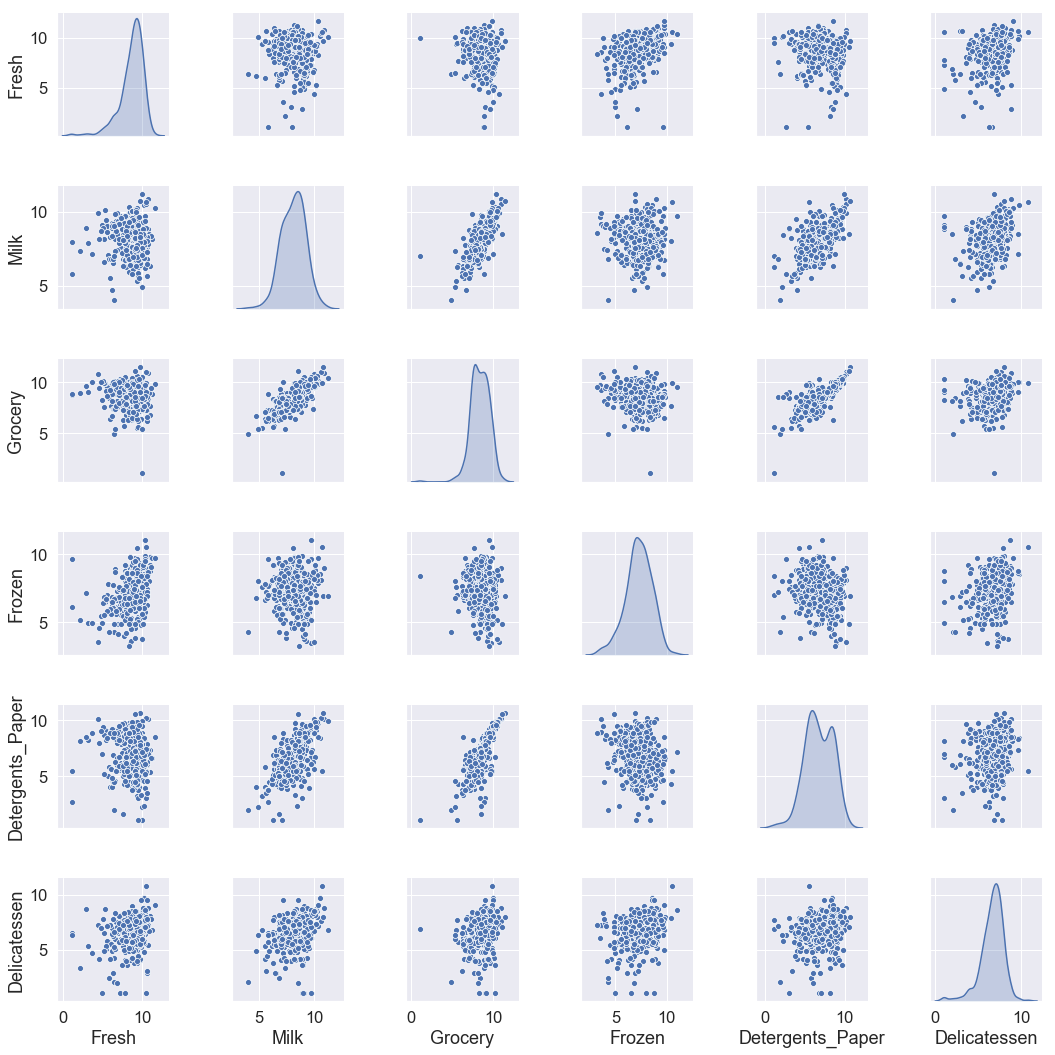

In [171]:
log_data = np.log(data.copy())

sns.pairplot(log_data[log_data.columns], size = 2.5, diag_kind ='kde')
plt.tight_layout()
plt.show()


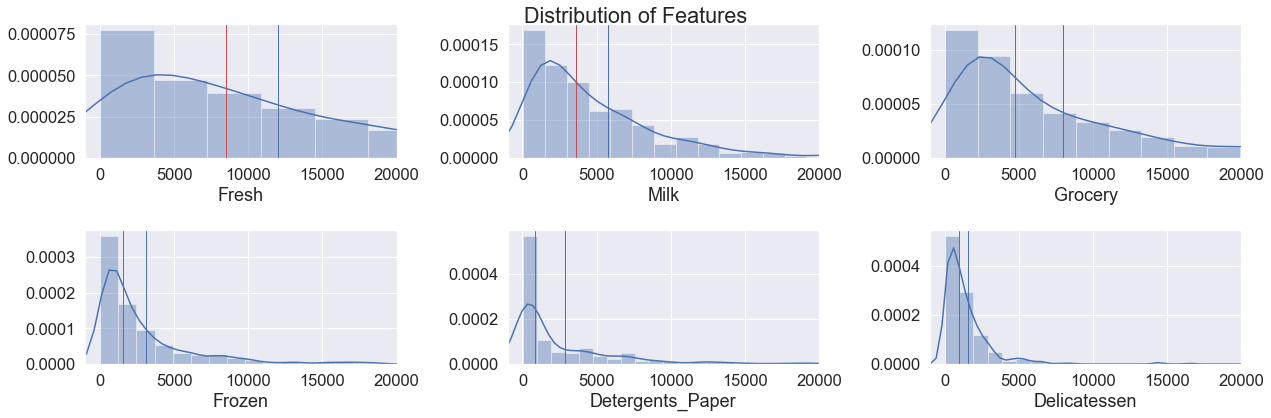

In [216]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

plt.tight_layout()


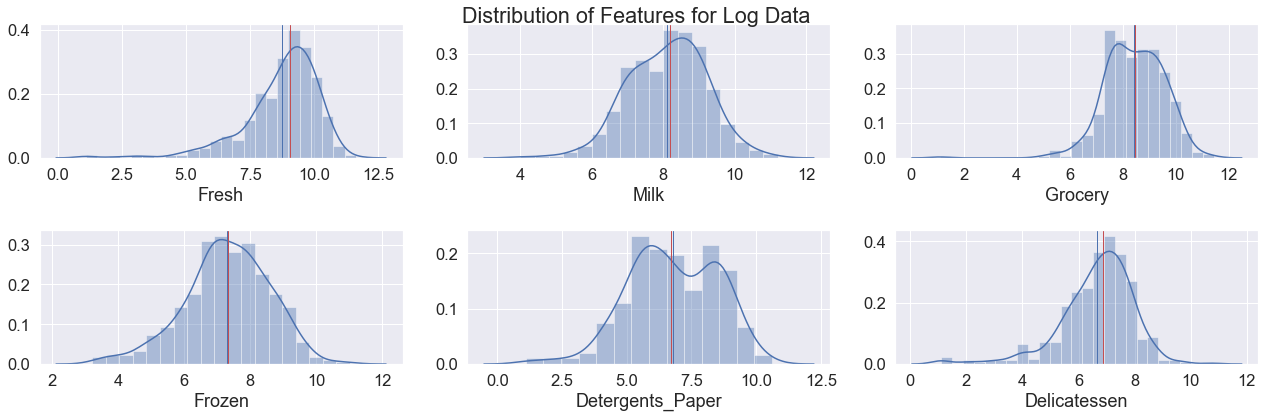

In [217]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')
    
plt.tight_layout()


#### Box-Cox transformation

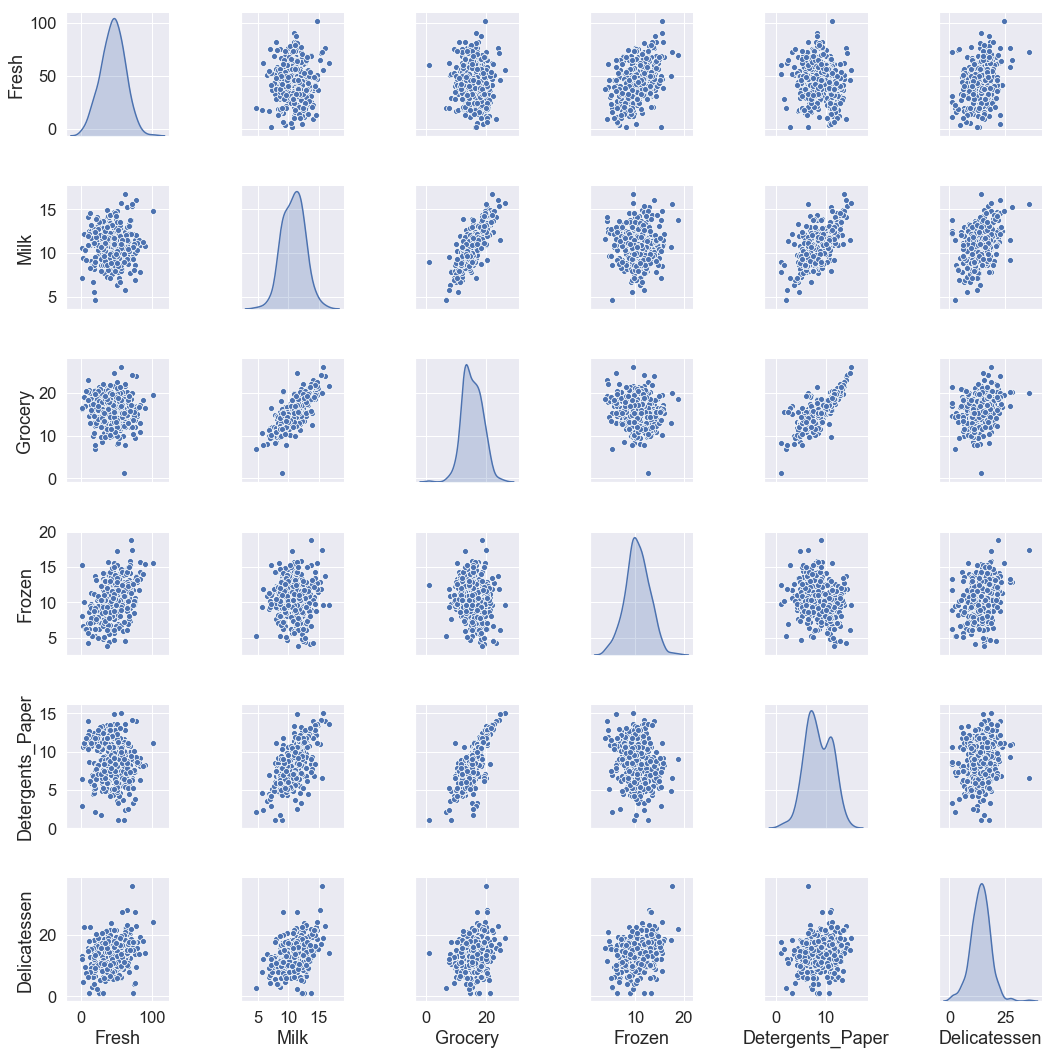

In [208]:
from scipy import stats

BoxCox_df = data.copy()
BoxCox_data = pd.DataFrame(columns = data.columns)

for i in BoxCox_df.columns:
    BoxCox_data[i], _  = pd.Series(stats.boxcox(BoxCox_df[i]))
    
sns.pairplot(BoxCox_data[BoxCox_data.columns], size = 2.5, diag_kind ='kde')
plt.tight_layout()
plt.show()

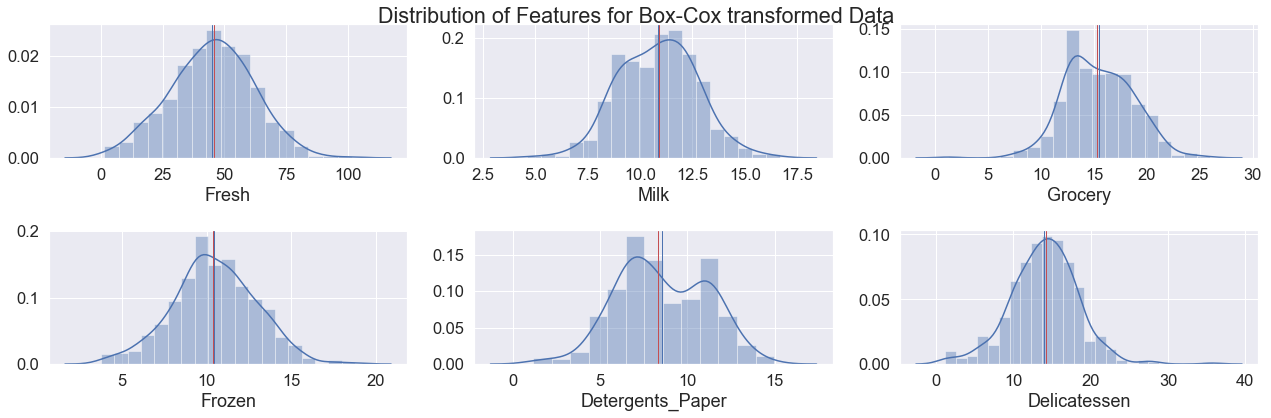

In [218]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Box-Cox transformed Data')

for i, col in enumerate(BoxCox_data.columns):
    feature = BoxCox_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')
    
plt.tight_layout()


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

#### Answer
Grocery-Detergents_Paper, the strongest correlated pair before is now weaker after log or box-cox transformation. Grocery-Milk, the second most correlated pair before is now stronger after the transformation.

#### Without transformation

Correlation matrix of features:


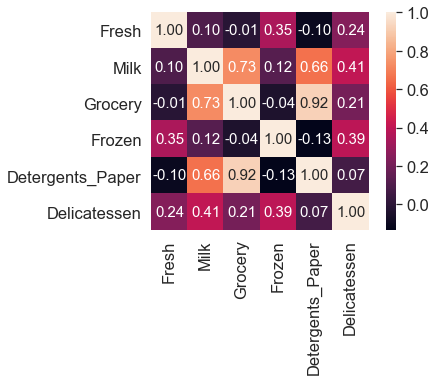

In [220]:
print('Correlation matrix of features:')
corr_matrix = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size':15},yticklabels=data.columns, xticklabels=data.columns)
plt.show()

#### Log_transformed

Correlation matrix of features:


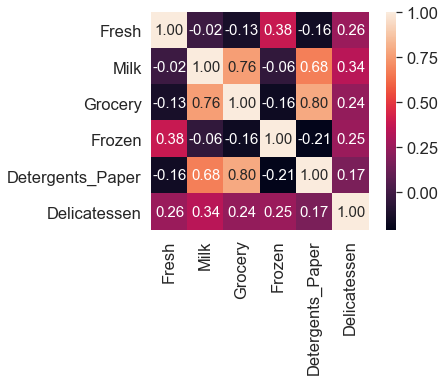

In [219]:
print('Correlation matrix of features:')
corr_matrix = np.corrcoef(log_data[log_data.columns].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size':15},yticklabels=data.columns, xticklabels=data.columns)
plt.show()

#### Box-Cox transformed

Correlation matrix of features:


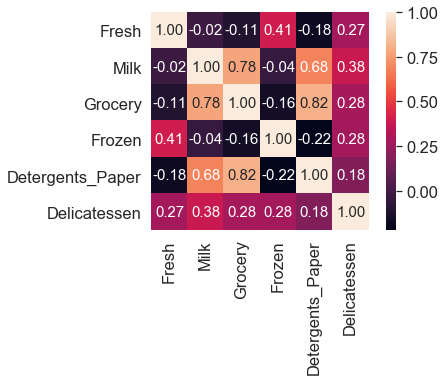

In [221]:
print('Correlation matrix of features:')
corr_matrix = np.corrcoef(BoxCox_data[BoxCox_data.columns].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size':15},yticklabels=data.columns, xticklabels=data.columns)
plt.show()

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [240]:
from collections import Counter
outliers_all_list = [] 

for i in log_data.columns:
    
    Q1 = np.percentile(log_data[i],25)
    Q3 = np.percentile(log_data[i],75)
    step = (Q3 - Q1) * 1.5
    
    outliers_ix = []
    
    for j in range(len(log_data[i])):
        
        if log_data[i][j] < (Q1 - step) or log_data[i][j] > (Q3 + step):
            outliers_ix.append(j)
            outliers_all_list.append(j)
            
    print(i)
    if len(outliers_ix)!=0:
        display(log_data.loc[outliers_ix, :])
            
            
print('Customer ID with data 3 or more features identified as outliers:', [k for k,v in Counter(outliers_all_list).items() if float(v) >= 3])

print('Customer ID with data 2 features identified as outliers:', [k for k,v in Counter(outliers_all_list).items() if float(v) == 2])

print('Customer ID with data 1 feature identified as outliers:', [k for k,v in Counter(outliers_all_list).items() if float(v) == 1])



Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Delicatessen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Customer ID with data 3 or more features identified as outliers: [154]
Customer ID with data 2 features identified as outliers: [65, 66, 128, 75]
Customer ID with data 1 feature identified as outliers: [81, 95, 96, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 356, 38, 57, 145, 175, 264, 325, 420, 429, 439, 161, 109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

#### Answer

See above. None of the outliers are removed as further information is required on the data collection to determine if the datapoints are outlying due to random errors in measurements or truely reflects the unique spending characteristics of the customers. 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

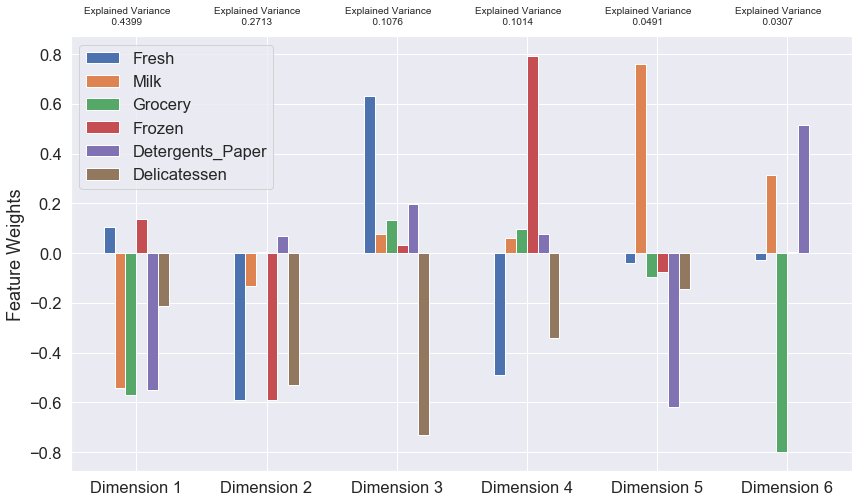

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
# https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca
good_data = log_data
sc = StandardScaler()
good_data_transformed = sc.fit_transform(good_data)
good_data_transformed_df = pd.DataFrame(good_data_transformed, columns=data.columns)

# PCA 
pca = PCA().fit(good_data_transformed)
pca_transformed = pca.transform(good_data_transformed)
pca_results = vs.pca_results(good_data_transformed_df, pca)


In [265]:
print(pca_transformed.shape)
print(pca.explained_variance_ratio_.shape)
np.where(np.cumsum(pca.explained_variance_ratio_)>0.99)

(440, 6)
(6,)


(array([5]),)

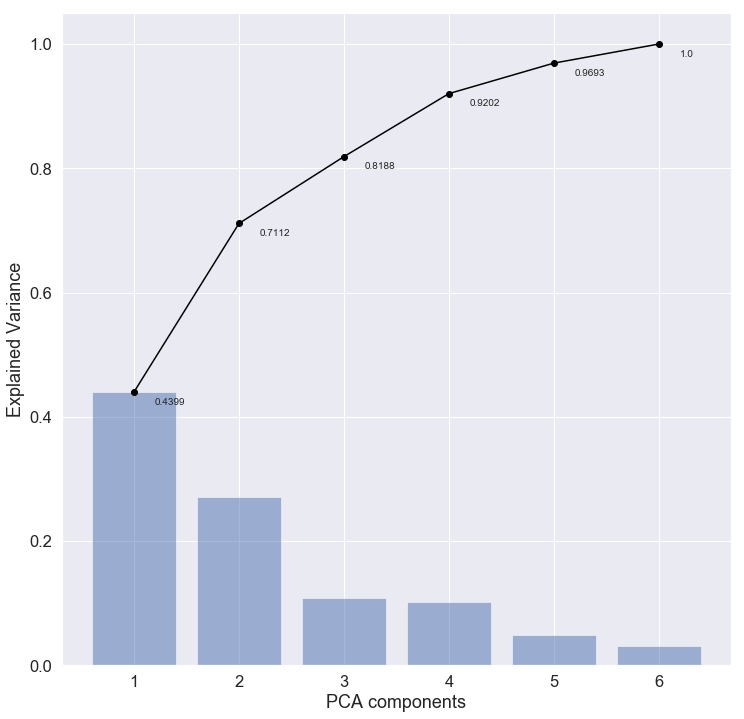

In [266]:
n_components = 6

# create an x-axis variable for each pca component
x = np.arange(1, n_components + 1)

# plot the cumulative variance
plt.figure(figsize=(12,12))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_[:n_components]), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_[:n_components], align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
#plt.annotate('Cumulative Explained Variance',
#             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_[:n_components])):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1, n_components + 1))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

#### Answer:

The total variance explained by the first and second principal components is 0.7112. The total variance explained by the first four principal components is  0.9202.


**PC 1:**

Customer with positive value for PC 1 
- High purchase of fresh, frozen
- Low purchase of Milk, Grocery, Detergents_Papers, Delicatessen 

Converse is true for negative value for PC 1 

**PC 2:**

Customer with positive value for PC 2
- Low purchase of Fresh, Milk, Frozen, Delicatessen 
- High purchase of Detergents_Papers

Converse is true for negative value for PC 2

**PC 3:**

Customer with positive value for PC 3
- High purchase of all categories other than Delicatessen
- Low purchase of Delicatessen

Converse is true for negative value for PC 3

**PC 4:**

Customer with positive value for PC 4
- High purchase for all categories other than Fresh and Delicatessen
- Low purchase for Fresh and Delicatessen

Converse is true for negative value for PC 4


[**Note:** The signs of the principal components are reversible but doesn't change the intepretation](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [269]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_transformed, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.3794,0.3038,0.2164,-1.4179,0.3359,0.2653
1,-1.4348,-0.5381,-0.0838,0.0331,0.1147,0.1847
2,-1.5040,-1.2262,-0.9782,-0.1483,-0.1441,0.3358
3,0.8241,-1.2058,-0.2448,0.3449,-0.7170,-0.4065
4,-0.7974,-1.7570,-0.3115,-0.2237,-0.2545,0.0148
5,-0.8855,-0.1308,-0.0295,-0.7005,0.3370,0.3897
6,-0.6053,0.4561,0.6525,-0.7341,-0.4404,0.0529
7,-1.1475,-0.6064,-0.3096,-0.1593,-0.4078,-0.0015
8,-0.5315,0.6252,0.0929,-0.6875,-0.1283,0.0088
9,-2.1894,-0.3276,-0.0736,-0.1135,-0.1405,-0.0216


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [273]:
pca_2components = PCA(n_components=2)
pca_2components.fit(good_data_transformed)
reduced_data = pca_2components.transform(good_data_transformed)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print(reduced_data.shape)
reduced_data.head(5)

(440, 2)


,Dimension 1,Dimension 2
0,-1.379375,0.303838
1,-1.434807,-0.538147
2,-1.503951,-1.226153
3,0.824133,-1.205770
4,-0.797388,-1.756986


### Observation
Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [288]:
# Vectors for each feature in the PC1-PC2 dimensions
feature_vectors = pca_2components.components_.T
for i, v in enumerate(feature_vectors):
    print(good_data_transformed_df.columns[i],  v)

Fresh [ 0.10462664 -0.59047385]
Milk [-0.54227414 -0.13314537]
Grocery [-0.57169402  0.00628236]
Frozen [ 0.13835053 -0.58953493]
Detergents_Paper [-0.5513378   0.06862424]
Delicatessen [-0.21223507 -0.53038924]


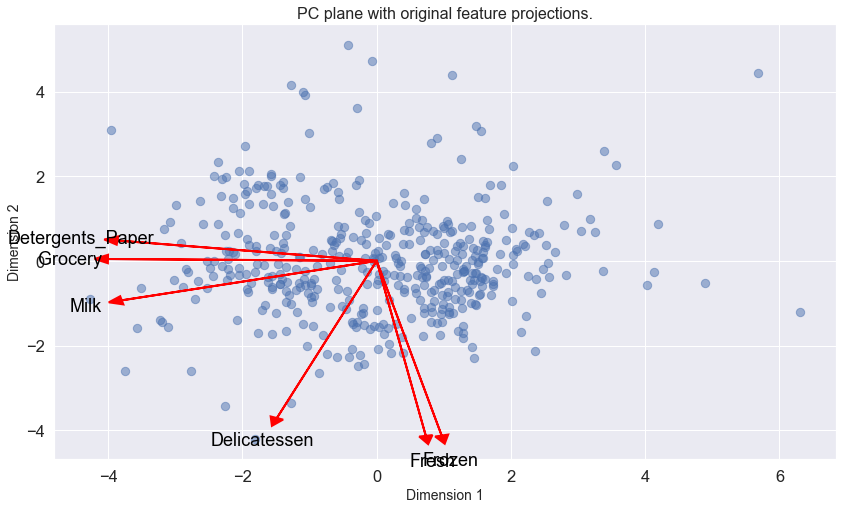

In [276]:
# Create a biplot
vs.biplot(good_data_transformed_df, reduced_data, pca_2components)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

The first principal component is strongly correlated with `Detergents_Paper`, `Grocery`, and `Milk`. The second principal component is strongly correlated with `Delicatessen`, `Fresh`, and `Frozen`. This correlation aligns with the `pca_results` plot. In fact, the feature weights shown on the `pca_results` plot are multiplied by a factor and used to plot the arrows in PC1-PC2 dimensions.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

### Answer

**K-Means**

Pros:
- Computationally fast and scales well to large number of samples.

Cons:
- Requires users to select how many classes there are, may not be trivial 
- Converges at a local minima/Starts with random choice of cluster centers and may yield different clustering results on different runs of algorithm 
- It assumes that the distribution of each feature is spherical, and performs poorly on elongated clusters or manifolds with irregular shapes.
- In high dimensions, Euclidean distances are inflated (curse of dimensionality), resulting in high computational costs. Performing dimensionality reduction, such as PCA prior to K-Means can reduce this issue.

Note: Some sources state that kmeans assumes that all clusters have roughly equal number of data points, and perform poorly in clusters with unequal number of data points. This may be misleading. K means splits the data space in roughly equal partitions and if the data is roughly uniformally distributed, each cluster will have roughly equal number of datapoints. If there is varying density in the dataset, 2 clusters of the same area will not have the same number of datapoints 



**Gaussian Mixture Model**

Pros:
- It is the fastest algorithm for clustering mixtures.
- As the algorithm maximizes only the likelihood, it does not bias the means towards zero or make assumptions that clusters have specific structures.

Cons:
-  When there is insufficient number of data points per cluster, it may be difficult for the algorithm to converge (unless one regularizes the covariances artificially)
- Like Kmeans, algorithm only guarantee that we land on local optimal point but doesn't guarantee local optima is global. If the algorithm starts with different initialization points, in general it lands into different configurations. Overcome issue by running many iterations and take average of silhouette scores to help choose optimal number of clusters

Gaussian Mixture Model is chosen as our data does not obey the assumptions of kmeans i.e. spherical distributions.

**References**

- https://www.inovex.de/blog/disadvantages-of-k-means-clustering/
- https://stats.stackexchange.com/questions/326685/is-it-true-that-k-means-has-an-assumption-each-cluster-has-a-roughly-equal-numb
- https://stats.stackexchange.com/questions/179297/assumption-of-equal-size-of-clusters-in-clustering
- http://varianceexplained.org/r/kmeans-free-lunch/
- http://scikit-learn.org/stable/modules/clustering.html#k-means
- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- http://scikit-learn.org/stable/modules/mixture.html#mixture
- https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95
- https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
- https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

#### Gaussian Mixture Model and choosing number of clusters based on Silhouette score

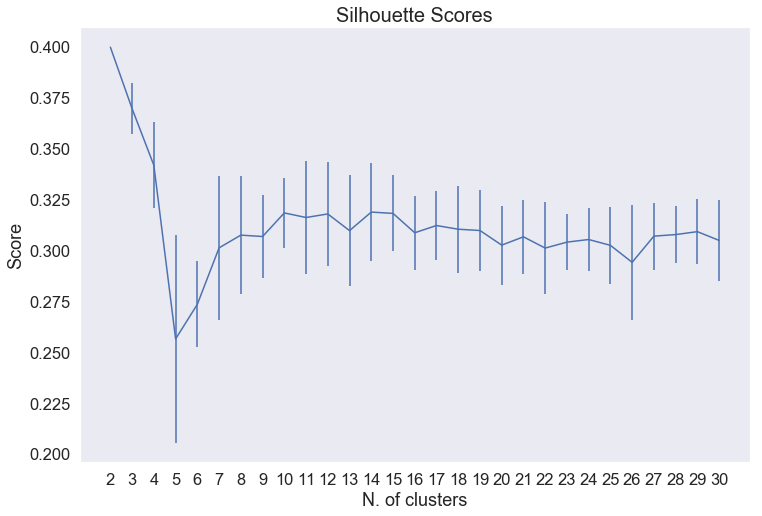

In [306]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_clusters = range(2,31)
num_repeats = 20
scores_avg = []
scores_std = []

for i in n_clusters:
    
    scores = []
    
    for j in range(num_repeats):

        clusterer = GaussianMixture(n_components=i, random_state=j).fit(reduced_data)
        # Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
        # Calculate the mean silhouette coefficient for the number of clusters chosen
        scores.append(silhouette_score(reduced_data,preds))

    scores_avg.append(np.mean(scores))
    scores_std.append(np.std(scores))

plt.subplots(figsize=(12,8))
plt.errorbar(n_clusters, scores_avg, yerr=scores_std)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.grid('off')


In [317]:
[print('Cluster ', n_clusters[i], ':', np.round(scores_avg[i],3), '+-', np.round((scores_std[i]),3)) for i in range(len(scores_avg))]
print('')

Cluster  2 : 0.399 +- 0.0
Cluster  3 : 0.369 +- 0.012
Cluster  4 : 0.342 +- 0.021
Cluster  5 : 0.256 +- 0.051
Cluster  6 : 0.273 +- 0.021
Cluster  7 : 0.301 +- 0.035
Cluster  8 : 0.307 +- 0.029
Cluster  9 : 0.307 +- 0.02
Cluster  10 : 0.318 +- 0.017
Cluster  11 : 0.316 +- 0.028
Cluster  12 : 0.318 +- 0.026
Cluster  13 : 0.309 +- 0.027
Cluster  14 : 0.319 +- 0.024
Cluster  15 : 0.318 +- 0.019
Cluster  16 : 0.308 +- 0.018
Cluster  17 : 0.312 +- 0.017
Cluster  18 : 0.31 +- 0.021
Cluster  19 : 0.31 +- 0.02
Cluster  20 : 0.302 +- 0.019
Cluster  21 : 0.306 +- 0.018
Cluster  22 : 0.301 +- 0.023
Cluster  23 : 0.304 +- 0.014
Cluster  24 : 0.305 +- 0.015
Cluster  25 : 0.302 +- 0.019
Cluster  26 : 0.294 +- 0.028
Cluster  27 : 0.307 +- 0.016
Cluster  28 : 0.308 +- 0.014
Cluster  29 : 0.309 +- 0.016
Cluster  30 : 0.305 +- 0.02



### Question
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

### Answer

The averaged silhouette scores vs the number of clusters are shown in the above bar chart and table. Two clusters give the highest silhouette score. 

#### Gaussian Mixture Model and choosing number of clusters based on distance between GMMs using  Jensen-Shannon (JS) metric


#### **References:**

https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb

https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms

The lesser is the JS-distance between the two GMMs, the more the GMMs agree on how to fit the data. Good configuration takes in account both the amount of information included (=biggest possible number of clusters) and on the stability of the fitting procedure (=lowest possible GMMs distance). 

In [323]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [324]:
n_clusters=np.arange(2, 31)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(reduced_data, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)
    

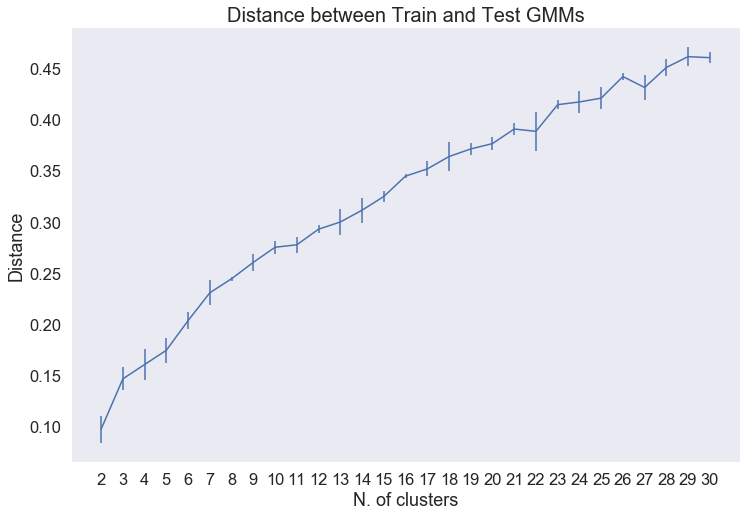

In [326]:
plt.subplots(figsize=(12,8))
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.grid('off')
plt.show()

Two clusters give the lowest possible GMMs distance.

Both Silhouette score and distance between GMMs agree that the optimal number of clusters for Gaussian Mixture Model clustering is 2. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

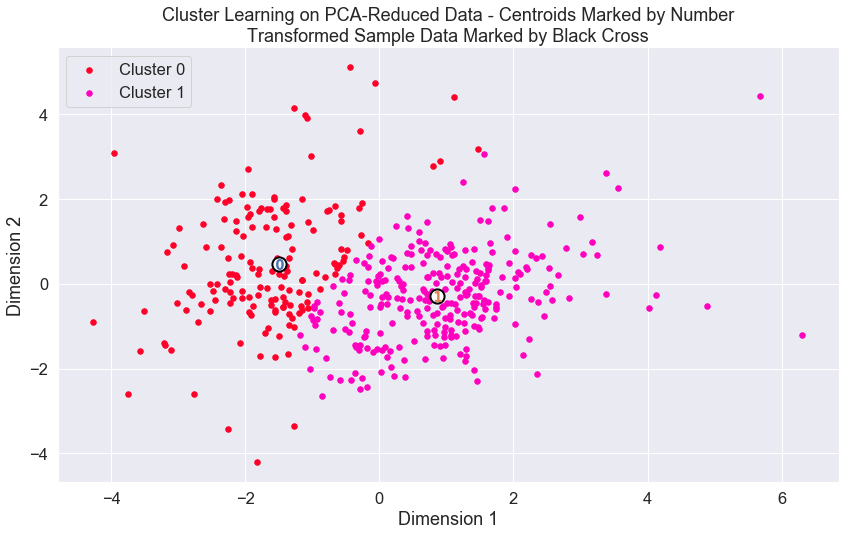

In [336]:
# Display the results of the clustering from implementation
# Use 2 clusters for clustering
clusterer = GaussianMixture(n_components=2,random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
vs.cluster_results(reduced_data, preds, centers)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [344]:
# Inverse transform the centers
log_centers = pca_2components.inverse_transform(centers)

# Inverse standard scaling
new_inverse = sc.inverse_transform(log_centers)

# Exponentiate the centers
true_centers = np.exp(new_inverse)

# print(log_centers)
# print('')
# print(new_inverse)
# print('')
# print(true_centers)

# Display the true centers
centroids = ['Centroid {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = centroids
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Centroid 0,3229.0,7529.0,12043.0,791.0,3858.0,851.0
Centroid 1,8993.0,2118.0,2677.0,2127.0,380.0,749.0


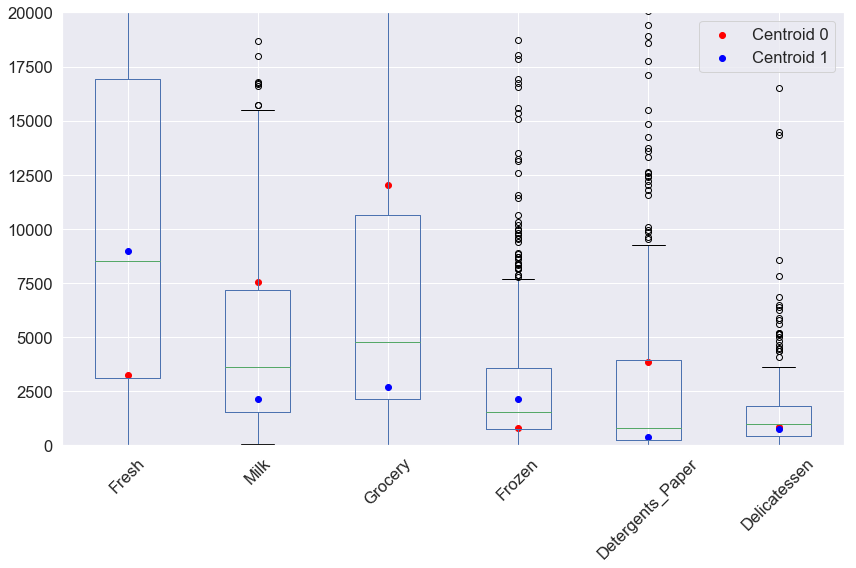

In [348]:
#The plot below is the zoomed in box plot and scatter plot.
import matplotlib.pyplot as plt
color = ['red','blue']

plt.subplots(figsize=(12,8))

data.boxplot()
for ix,color in zip(['Centroid 0','Centroid 1'],color):
    plt.scatter(np.arange(1,7),true_centers.loc[ix].values,marker='o',
                color=color,label=ix)
plt.legend(loc='upper right')
plt.ylim(0,20000)
plt.xticks(rotation=45)
plt.tight_layout();

### Question
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

### Answer 


Segment 0 customers have high purchase of milk, grocery, detergents_paper and low purchase of fresh and frozen products. These customers may represent convenience stores. 

Segment 1 customers have high purchase of fresh and frozen products and may represent larger supermarkets. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Answer

We can sample a subset of customers from each of the 2 segments and introduce the new delivery service with some incentives. We can then collect feedback from these customers and quantify the percentage of customers with positive, negative, neutral feedback in each of these customer segments. 
 

### Question
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Answer 

We can use the existing dataset as the training dataset to predict the customer segment of each new customer using total purchases in each categories as features and the customer segments as target variable/label.  

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

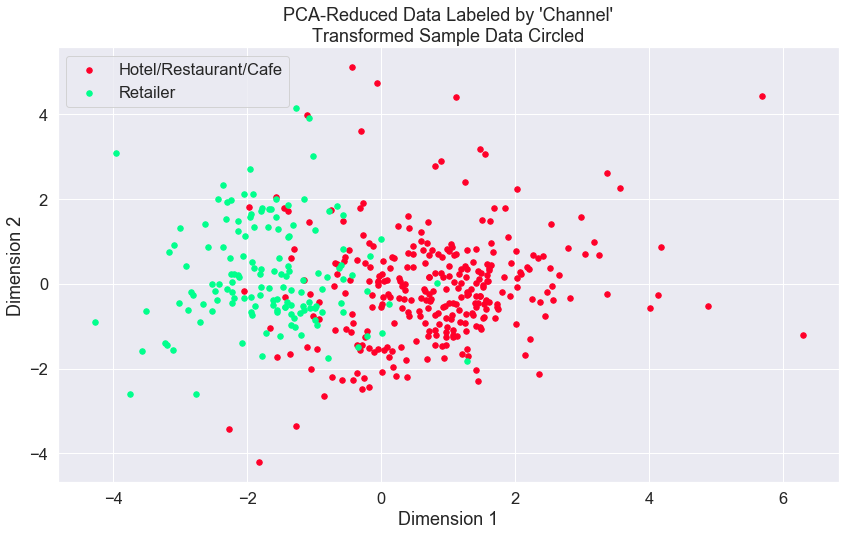

In [353]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers = [])

### Question

*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

### Answer

The 2 clusters from Gaussian mixture model matches the underlying distribution of 'Channel' fairly well, although there are small number of customers in both the 'Retailer' and 'Hotel/Restaurant/Cafe' groups that are labeled in the wrong segments. 
